<a href="https://colab.research.google.com/github/jorferr89/10-ejemplos-opencv-python/blob/main/HaarCascadesVehiculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Detección de Vehículos con Haar Cascades

Se importan las librerías necesarias.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

Se carga la foto a color.

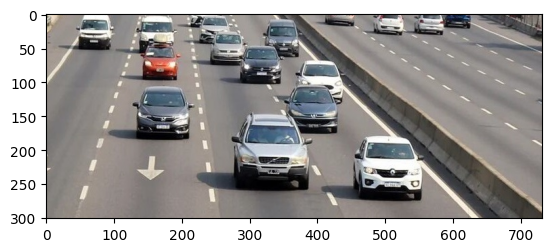

In [ ]:
image = cv2.imread('imagen_vehiculos.jpg')
# Convierte a RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Se convierte la imagen a escala de grises.

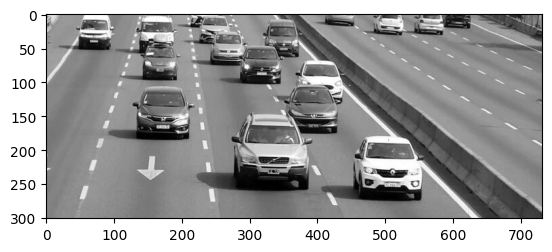

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

Se carga un modelo pre-entrenado para detectar múltiples vehículos en una imagen. Los pesos y parámetros de este modelo están en el archivo haarcascade_car.xml.

In [ ]:
car_cascade = cv2.CascadeClassifier('haarcascade_car.xml')
# Ejecutar en la imagen en escala de grises.
cars = car_cascade.detectMultiScale(gray, 1.1, 1)

El clasificador nos devuelve un arreglo de recuadros delimitadores para cada vehículo encontrado en la imagen.

In [ ]:
print(f'{len(cars)} vehículos detectados.')
print('Coordenadas en el siguiente formato: (X, Y, width, height)')
print('=============================')
print(cars)

11 vehículos detectados.
Coordenadas en el siguiente formato: (X, Y, width, height)
[[617  32  21  21]
 [554   2  41  41]
 [241   3  57  57]
 [ 31   2  70  70]
 [330  23  56  56]
 [227  26  71  71]
 [127  42  76  76]
 [265  31 101 101]
 [ 89  84 148 148]
 [272 151 149 149]
 [479 198  61  61]]


Se dibuja los cuadros que el algoritmo encontró encima de la imagen original para visualizar si
dichas detecciones tienen sentido.

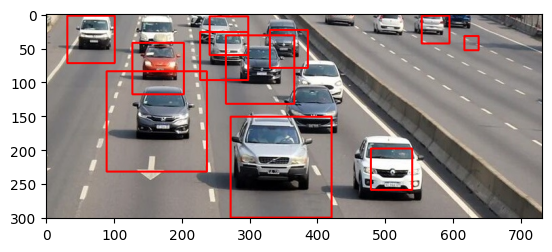

In [ ]:
image_with_detections = np.copy(image)
for (x, y, width, height) in cars:
  cv2.rectangle(image_with_detections, (x, y), (x + width, y + height), (255, 0, 0), 2)
plt.imshow(image_with_detections)

Algunos vehículos no fueron detectados, pero de igual manera se podría utilizar para contar los vehículos que pasan por la ruta en un momento específico y, por ejemplo, conocer el horario de mayor circulación.

También se observó un error en la detección.